In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Import the Support Vector Classifier
import scipy.sparse as sp
import torch.optim as optim
#import seaborn as sns
%matplotlib inline

In [2]:
# Attempt to read the file with error handling
try:
    df = pd.read_csv('Lending_Club_modelling_data_part1.txt', delimiter='\t')
except pd.errors.ParserError as e:
    print("Error parsing data:", e)
    # Handle the error or adjust parsing logic as needed

In [3]:
df1 = pd.read_csv('Lending_Club_modelling_data_part1.txt', delimiter='\t')
df1['loan_status'] = df1['loan_status'].replace({'Charged Off': 0, 'Fully Paid': 1})
df2 = pd.read_csv('Lending_Club_modelling_data_part2.txt', delimiter='\t')
df2['loan_status'] = df1['loan_status'].replace({'Charged Off': 0, 'Fully Paid': 1})
df3 = pd.read_csv('Lending_Club_modelling_data_part3.txt', delimiter='\t')
df3['loan_status'] = df1['loan_status'].replace({'Charged Off': 0, 'Fully Paid': 1})
df4 = pd.read_csv('Lending_Club_modelling_data_part4.txt', delimiter='\t')
df4['loan_status'] = df1['loan_status'].replace({'Charged Off': 0, 'Fully Paid': 1})
df1.head()

/var/folders/l6/8b55cv6j40b20nltsdxdq57h0000gn/T/ipykernel_83315/2909974959.py:3: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('Lending_Club_modelling_data_part2.txt', delimiter='\t')


,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,...,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,...,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,...,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,...,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
issue_date=df1['issue_d']
issue_date=pd.to_datetime(issue_date)
issue_date=issue_date.dt.year
#print(issue_date.describe())
#print(issue_date)
# Group data by issue year and count occurrences
people_by_year = issue_date.value_counts().sort_index()

# Print the number of people for each year
print("Number of People for Each Year for df1:")
print(people_by_year)

Number of People for Each Year for df1:
issue_d
2007       40
2008      313
2009      917
2010     2347
2011     4348
2012    10115
2013    24475
2014    25653
2015    23697
2016     7103
Name: count, dtype: int64


/var/folders/l6/8b55cv6j40b20nltsdxdq57h0000gn/T/ipykernel_83315/4068923866.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  issue_date=pd.to_datetime(issue_date)


In [5]:
issue_date=df2['issue_d']
issue_date=pd.to_datetime(issue_date)
issue_date=issue_date.dt.year
#print(issue_date.describe())
#print(issue_date)
# Group data by issue year and count occurrences
people_by_year = issue_date.value_counts().sort_index()

# Print the number of people for each year
print("Number of People for Each Year for df1:")
print(people_by_year)

Number of People for Each Year for df1:
issue_d
2007       54
2008      331
2009     1025
2010     2318
2011     4370
2012    10363
2013    24459
2014    25711
2015    23425
2016     6953
Name: count, dtype: int64


/var/folders/l6/8b55cv6j40b20nltsdxdq57h0000gn/T/ipykernel_83315/623758448.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  issue_date=pd.to_datetime(issue_date)


In [6]:
issue_date=df3['issue_d']
issue_date=pd.to_datetime(issue_date)
issue_date=issue_date.dt.year
#print(issue_date.describe())
#print(issue_date)
# Group data by issue year and count occurrences
people_by_year = issue_date.value_counts().sort_index()

# Print the number of people for each year
print("Number of People for Each Year for df1:")
print(people_by_year)

Number of People for Each Year for df1:
issue_d
2007       45
2008      282
2009      932
2010     2276
2011     4417
2012    10396
2013    24459
2014    25702
2015    23534
2016     6966
Name: count, dtype: int64


/var/folders/l6/8b55cv6j40b20nltsdxdq57h0000gn/T/ipykernel_83315/2152359280.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  issue_date=pd.to_datetime(issue_date)


In [7]:
issue_date=df4['issue_d']
issue_date=pd.to_datetime(issue_date)
issue_date=issue_date.dt.year
# Group data by issue year and count occurrences
people_by_year = issue_date.value_counts().sort_index()

# Print the number of people for each year
print("Number of People for Each Year for df1:")
print(people_by_year)


Number of People for Each Year for df1:
issue_d
2007       56
2008      314
2009      952
2010     2317
2011     4300
2012    10328
2013    24269
2014    25794
2015    23608
2016     7066
Name: count, dtype: int64


/var/folders/l6/8b55cv6j40b20nltsdxdq57h0000gn/T/ipykernel_83315/1573017955.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  issue_date=pd.to_datetime(issue_date)


list of the categorical values

In [8]:
categorical_vars = ['term', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type']
for var in categorical_vars:
    x=df[var].dropna()
    print(x.value_counts())


term
 36 months    75448
 60 months    23560
Name: count, dtype: int64
emp_title
Teacher                   1112
Manager                   1088
Registered Nurse           480
RN                         463
Supervisor                 462
                          ... 
rallys hamburgers            1
Lobby Starter                1
Mortenson Construction       1
Tool Room Supervisor         1
Pavia-Marting & Co.          1
Name: count, Length: 52744, dtype: int64
emp_length
10+ years    31682
2 years       8926
3 years       7966
< 1 year      7929
5 years       6644
1 year        6334
4 years       5873
6 years       5229
7 years       5186
8 years       4779
9 years       3922
Name: count, dtype: int64
home_ownership
MORTGAGE    49668
RENT        39929
OWN          9376
OTHER          26
NONE            7
ANY             2
Name: count, dtype: int64
verification_status
Verified           34655
Source Verified    32907
Not Verified       31446
Name: count, dtype: int64
loan_status
Fully Pai

Verification status vs default

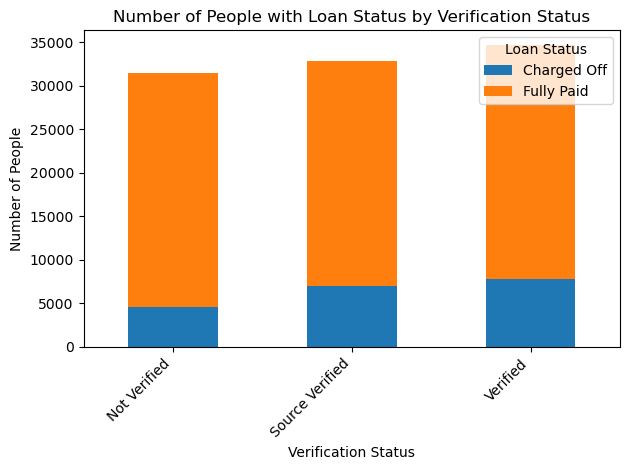

Ratio for each verification status:
verification_status
Not Verified       0.146664
Source Verified    0.212265
Verified           0.224095
dtype: float64


In [9]:
# Group data by verification status and loan status, and count occurrences
grouped_data = df.groupby(['verification_status', 'loan_status']).size().unstack(fill_value=0)

# Aggregate by verification status and sum the counts for each loan status
grouped_data = grouped_data.groupby(level=0).sum()

# Plot histogram
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Verification Status')
plt.ylabel('Number of People')
plt.title('Number of People with Loan Status by Verification Status')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

# Calculate the ratio for each verification status
ratio_by_verification_status = grouped_data['Charged Off'] / grouped_data.sum(axis=1)

# Print the ratio for each verification status
print("Ratio for each verification status:")
print(ratio_by_verification_status)

employment length versus default

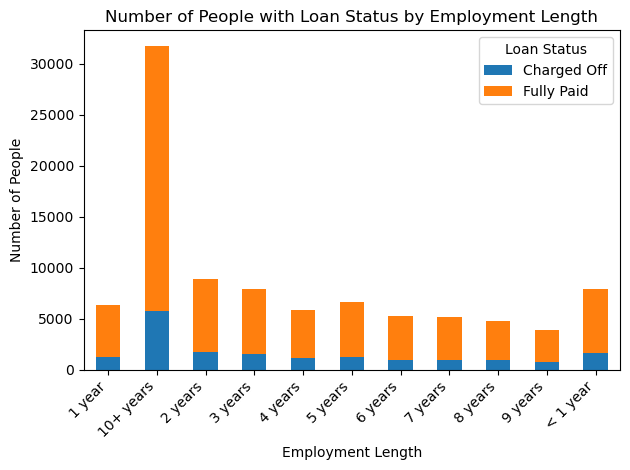

Ratio for each employment length:
emp_length
1 year       0.202084
10+ years    0.183006
2 years      0.197961
3 years      0.193698
4 years      0.190363
5 years      0.193709
6 years      0.185313
7 years      0.193598
8 years      0.201297
9 years      0.195309
< 1 year     0.205322
dtype: float64


In [10]:
# Group data by employment length and loan status, and count occurrences
grouped_data = df.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)

# Aggregate by employment length and sum the counts for each loan status
grouped_data = grouped_data.groupby(level=0).sum()

# Plot histogram
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Employment Length')
plt.ylabel('Number of People')
plt.title('Number of People with Loan Status by Employment Length')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

# Calculate the ratio for each employment length
ratio_by_employment_length = grouped_data['Charged Off'] / grouped_data.sum(axis=1)

# Print the ratio for each employment length
print("Ratio for each employment length:")
print(ratio_by_employment_length)

Initial status vs default

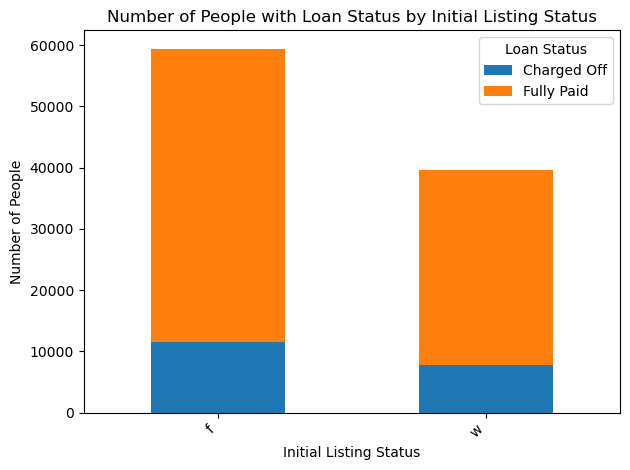

Ratio for each initial listing status:
initial_list_status
f    0.193922
w    0.198045
dtype: float64


In [11]:
# Group data by initial listing status and loan status, and count occurrences
grouped_data = df.groupby(['initial_list_status', 'loan_status']).size().unstack(fill_value=0)

# Aggregate by initial listing status and sum the counts for each loan status
grouped_data = grouped_data.groupby(level=0).sum()

# Plot histogram
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Initial Listing Status')
plt.ylabel('Number of People')
plt.title('Number of People with Loan Status by Initial Listing Status')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

# Calculate the ratio for each initial listing status
ratio_by_initial_status = grouped_data['Charged Off'] / grouped_data.sum(axis=1)

# Print the ratio for each initial listing status
print("Ratio for each initial listing status:")
print(ratio_by_initial_status)

Professions versus default

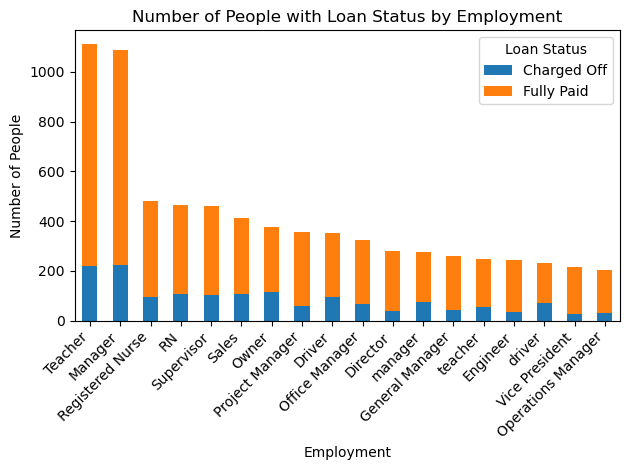

Ratios of Charged Off cases to total cases for each profession:
Teacher: 19.87%
Manager: 20.40%
Registered Nurse: 19.58%
RN: 22.68%
Supervisor: 22.29%
Sales: 25.36%
Owner: 30.42%
Project Manager: 15.97%
Driver: 27.20%
Office Manager: 20.99%
Director: 13.57%
manager: 27.64%
General Manager: 16.99%
teacher: 22.58%
Engineer: 14.69%
driver: 31.30%
Vice President: 12.50%
Operations Manager: 15.35%


In [12]:
# Group data by employment title and count occurrences

profession_counts = df1['emp_title'].value_counts()

# Filter professions with counts greater than 100
professions_gt_100 = profession_counts[profession_counts > 200]

aggregated_data_list = []

charged_off_ratios = []

# Aggregate data for each profession and append to aggregated_data_list
for profession in professions_gt_100.index:
    # Filter data for the specific profession
    filtered_data = df[df['emp_title'] == profession]
    
    # Group filtered data by employment title and loan status, and count occurrences
    grouped_data = filtered_data.groupby(['emp_title', 'loan_status']).size().unstack(fill_value=0)
    
    # Aggregate by employment title and sum the counts for each loan status
    grouped_data = grouped_data.groupby(level=0).sum()
    
    # Append to aggregated_data_list
    aggregated_data_list.append(grouped_data)

    # Calculate ratio of "Charged Off" cases to the total number of cases
    total_cases = grouped_data.sum(axis=1).sum()
    charged_off_cases = grouped_data['Charged Off'].sum()
    charged_off_ratio = charged_off_cases / total_cases
    charged_off_ratios.append((profession, charged_off_ratio))
# Concatenate DataFrames in the aggregated_data_list
aggregated_data = pd.concat(aggregated_data_list)

# Plot histogram for all professions on the same plot
aggregated_data.plot(kind='bar', stacked=True)
plt.xlabel('Employment')
plt.ylabel('Number of People')
plt.title('Number of People with Loan Status by Employment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()
print("Ratios of Charged Off cases to total cases for each profession:")
for profession, ratio in charged_off_ratios:
    print(f"{profession}: {ratio:.2%}")

State versus default (it is 20 percent for each not helpful)

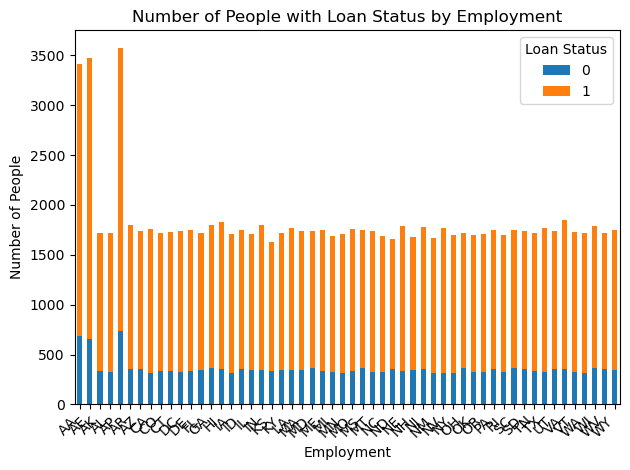

Ratio for each address:
address
AA    0.200703
AE    0.188940
AK    0.195349
AL    0.191168
AP    0.205430
AR    0.194769
AZ    0.205511
CA    0.179954
CO    0.194767
CT    0.193399
DC    0.187464
DE    0.191867
FL    0.202208
GA    0.203776
HI    0.192329
IA    0.181553
ID    0.201258
IL    0.201170
IN    0.191430
KS    0.207235
KY    0.202450
LA    0.193785
MA    0.200690
MD    0.210132
ME    0.188571
MI    0.191943
MN    0.182191
MO    0.191151
MS    0.206186
MT    0.188972
NC    0.191967
ND    0.211191
NE    0.185619
NH    0.203461
NJ    0.200225
NM    0.186005
NV    0.176537
NY    0.184443
OH    0.213994
OK    0.189777
OR    0.188967
PA    0.201373
RI    0.190224
SC    0.207331
SD    0.202189
TN    0.193605
TX    0.181818
UT    0.204702
VA    0.192537
VT    0.189346
WA    0.184364
WI    0.204025
WV    0.207777
WY    0.195540
dtype: float64


In [13]:
# Group data by employment title and loan status, and count occurrences
df1['address'] = df1['address'].str.split(',').str[-1].str.strip().str.split().str[-2]
grouped_data = df1.groupby(['address', 'loan_status']).size().unstack(fill_value=0)

# Aggregate by employment title and sum the counts for each loan status
grouped_data = grouped_data.groupby(level=0).sum()

# Plot histogram
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Employment')
plt.ylabel('Number of People')
plt.title('Number of People with Loan Status by Employment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

# Calculate the ratio for each address
ratio_by_address = grouped_data[0] / grouped_data.sum(axis=1)

# Print the ratio for each address
print("Ratio for each address:")
print(ratio_by_address)


default versus home ownership

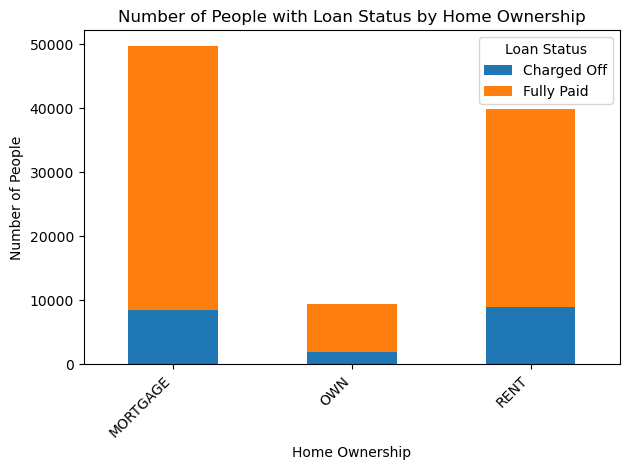

Ratio for each home ownership:
home_ownership
MORTGAGE    0.170049
OWN         0.202538
RENT        0.225625
dtype: float64


In [14]:
# Filter data for 'RENT', 'OWN', and 'MORTGAGE' home ownership
filtered_data = df[df['home_ownership'].isin(['RENT', 'OWN', 'MORTGAGE'])]

# Group filtered data by home ownership and loan status, and count occurrences
grouped_data = filtered_data.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)

# Aggregate by home ownership and sum the counts for each loan status
grouped_data = grouped_data.groupby(level=0).sum()

# Plot histogram
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Home Ownership')
plt.ylabel('Number of People')
plt.title('Number of People with Loan Status by Home Ownership')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

# Calculate the ratio for each home ownership
ratio_by_home_ownership = grouped_data['Charged Off'] / grouped_data.sum(axis=1)

# Print the ratio for each home ownership
print("Ratio for each home ownership:")
print(ratio_by_home_ownership)

application type vs default (DIRECT_PAY 0.380282 has higher percentage of default)

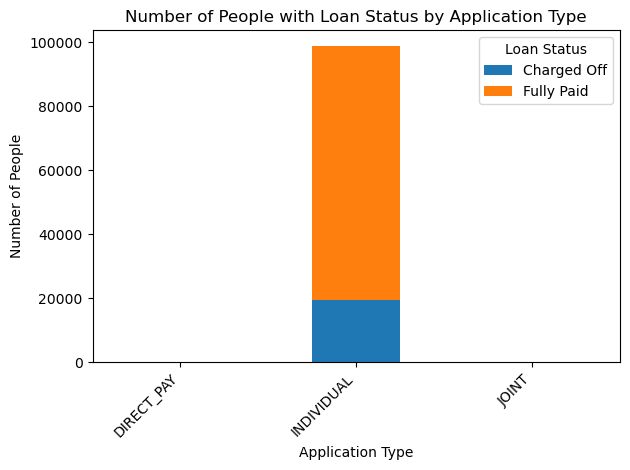

Ratio for each application type:
application_type
DIRECT_PAY    0.380282
INDIVIDUAL    0.195481
JOINT         0.151515
dtype: float64


In [15]:
# Group data by application type and loan status, and count occurrences
grouped_data = df.groupby(['application_type', 'loan_status']).size().unstack(fill_value=0)

# Aggregate by application type and sum the counts for each loan status
grouped_data = grouped_data.groupby(level=0).sum()

# Plot histogram
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Application Type')
plt.ylabel('Number of People')
plt.title('Number of People with Loan Status by Application Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

# Calculate the ratio for each application type
ratio_by_application_type = grouped_data['Charged Off'] / grouped_data.sum(axis=1)

# Print the ratio for each application type
print("Ratio for each application type:")
print(ratio_by_application_type)

List of numerical columns and the statistical analsis of each column (it is commented out)

In [16]:
numerical_columns = df1.select_dtypes(include='number').columns.tolist()

# Print the list of numerical columns
print("Numerical Columns:")
print(numerical_columns)

'''
numerical_vars = numerical_columns
for var in numerical_columns:
    x=df[var].dropna()
    print(x.describe())
'''

Numerical Columns:
['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


'\nnumerical_vars = numerical_columns\nfor var in numerical_columns:\n    x=df[var].dropna()\n    print(x.describe())\n'

Maybe the target variable is the loan status? This is histrical data so if it is not fully paid that there is default?
If so i would like to set my "y" as the loan status and learn based on the other statististics.

This is where i realized the target variable is the loan status. Then i replaced 'Charged Off': 0, 'Fully Paid': 1' so that i can do the logistic regression. (at the beginning)

In [17]:
loan_status = df1['loan_status'].dropna()
counts=loan_status.value_counts()
print(counts)


loan_status
1    79645
0    19363
Name: count, dtype: int64


Calculate the correlation matrix to see which variables are related the most to the loan status. Then i will only take those columns in the X variable for the regression.

In [18]:
# Calculate the correlation matrix
numerical_correlation_matrix = df1[numerical_columns].corr()

# Find the correlation with the target variable
correlation_with_target = numerical_correlation_matrix['loan_status'].abs().sort_values(ascending=False)
print("Correlation with target variable:")
print(correlation_with_target)

# Select features with strong correlations (absolute correlation greater than a threshold, e.g., 0.1)
relevant_features = correlation_with_target[correlation_with_target > 0.1].index.tolist()

print("Relevant numerical features based on correlation analysis:")
print(relevant_features)
print(relevant_features[1:4])

Correlation with target variable:
loan_status             1.000000
int_rate                0.244146
dti                     0.129718
revol_util              0.077827
mort_acc                0.073102
annual_inc              0.060193
loan_amnt               0.058715
installment             0.039958
total_acc               0.022719
open_acc                0.021358
revol_bal               0.013471
pub_rec                 0.012973
pub_rec_bankruptcies    0.004512
Name: loan_status, dtype: float64
Relevant numerical features based on correlation analysis:
['loan_status', 'int_rate', 'dti']
['int_rate', 'dti']


Logistic Regression with feature selection as above.

think about time dependency, 2015 might not behave like 2018

instead train on 2020, validate on 2021 test on 2022

In [19]:
# Step 1: Data Preprocessing
# Handle missing values and encode categorical variables (not shown)

# Step 2: Feature Selection
# Select relevant numerical features based on correlation analysis (not shown)

# Step 3: Drop missing values from both X and y
'''
df_clean = df.dropna(subset=numerical_columns + ['loan_status'])
X = df_clean[numerical_columns]  # Use numerical columns as features
y = df_clean['loan_status']  # Assuming 'loan_status' is the target variable
'''
df_clean = df1.dropna(subset=relevant_features)
X = df_clean[relevant_features[1:4]]  # Use numerical columns as features
y = df_clean['loan_status']  # Assuming 'loan_status' is the target variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training
# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Predict the target variable on the testing set
y_pred = model.predict(X_test)

# Predict the target variable probabilities on the testing set
y_prob = model.predict_proba(X_test)

# Extract the probability of the positive class (1)
y_prob_positive_class = y_prob[:, 1]
 
# Evaluate the model
print("y_prob_positive_class:", y_prob_positive_class)
print("y_pred:", y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_prob_positive_class: [0.77650522 0.84233942 0.9186235  ... 0.84559144 0.90649358 0.64292797]
y_pred: [1 1 1 ... 1 1 1]
Accuracy: 0.8045651954348045
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.04      0.07      3845
           1       0.81      0.99      0.89     15957

    accuracy                           0.80     19802
   macro avg       0.64      0.51      0.48     19802
weighted avg       0.74      0.80      0.73     19802



doesn't seems so useful but the area under the curve i.e. AUC score: if closer to 1 perfect, if closer to 0.5: random guessing

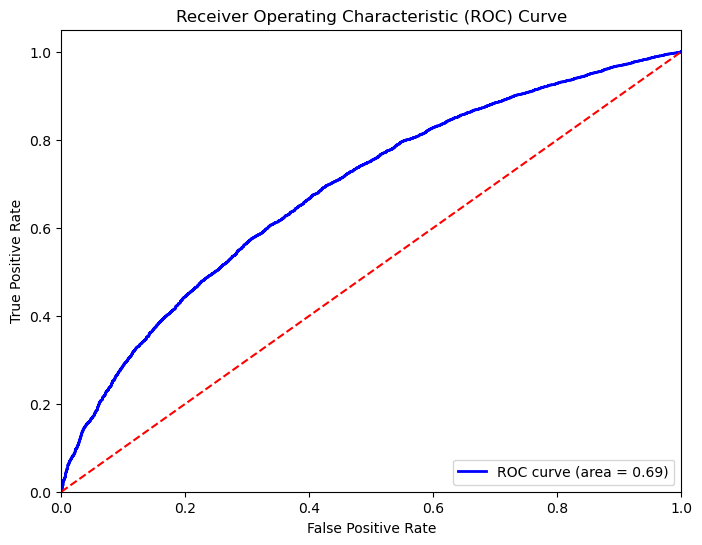

Model Evaluation:
Accuracy: 0.8045651954348045
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.04      0.07      3845
           1       0.81      0.99      0.89     15957

    accuracy                           0.80     19802
   macro avg       0.64      0.51      0.48     19802
weighted avg       0.74      0.80      0.73     19802

AUC Score: 0.6854047935882301


In [20]:
from sklearn.metrics import roc_curve, auc
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive_class)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display evaluation metrics
print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("AUC Score:", roc_auc)

with regularization


In [21]:
# Step 5: Model Training with Regularization
# Fit a logistic regression model with L2 regularization
# You can specify the regularization strength using the 'C' parameter (smaller values indicate stronger regularization)
# The 'solver' parameter specifies the algorithm to use in the optimization problem, and 'random_state' ensures reproducibility
model = LogisticRegression(penalty='l2', C=1 , solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Predict the target variable on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred)) 

Accuracy: 0.8045651954348045
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.04      0.07      3845
           1       0.81      0.99      0.89     15957

    accuracy                           0.80     19802
   macro avg       0.64      0.51      0.48     19802
weighted avg       0.74      0.80      0.73     19802



Random forest model

In [22]:
# Step 5: Model Training
# Fit a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Predict the target variable on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)
print("Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.732047267952732
Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.22      0.24      3845
           1       0.82      0.85      0.84     15957

    accuracy                           0.73     19802
   macro avg       0.55      0.54      0.54     19802
weighted avg       0.71      0.73      0.72     19802



Support vector classifier (takes +2 min) very slighlty better than logistic regression

In [23]:
'''
# Step 5: Model Training
# Fit a Support Vector Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Predict the target variable on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Model Accuracy:", accuracy_svm)
print("Support Vector Machine Model Classification Report:")
print(classification_report(y_test, y_pred_svm))
'''

'\n# Step 5: Model Training\n# Fit a Support Vector Classifier\nsvm_model = SVC()\nsvm_model.fit(X_train, y_train)\n\n# Step 6: Model Evaluation\n# Predict the target variable on the testing set\ny_pred_svm = svm_model.predict(X_test)\n\n# Evaluate the SVM model\naccuracy_svm = accuracy_score(y_test, y_pred_svm)\nprint("Support Vector Machine Model Accuracy:", accuracy_svm)\nprint("Support Vector Machine Model Classification Report:")\nprint(classification_report(y_test, y_pred_svm))\n'

ill get the coeffs and then plug in the features i used with the wieghts and then inverst the logstic regression function to get the PD

In [24]:
# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

# Example data
# Assuming df_clean, X, y are defined as mentioned in the question
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Adding an extra dimension

# Initialize model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 64
model = NeuralNetwork(input_size, hidden_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Convert test data to PyTorch tensor
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Switch model to evaluation mode
model.eval()

# Predict probabilities for the test set
with torch.no_grad():
    y_prob_tensor = model(X_test_tensor)
    y_prob_numpy = y_prob_tensor.numpy()

# Probability of class 1 for the first few samples
print("Probabilities of class 1:")
print(y_prob_numpy[:5])  # Change the number to see more samples

Epoch [1/10], Loss: 0.7231
Epoch [2/10], Loss: 0.6100
Epoch [3/10], Loss: 0.5562
Epoch [4/10], Loss: 0.5463
Epoch [5/10], Loss: 0.5577
Epoch [6/10], Loss: 0.5706
Epoch [7/10], Loss: 0.5761
Epoch [8/10], Loss: 0.5743
Epoch [9/10], Loss: 0.5679
Epoch [10/10], Loss: 0.5595
Probabilities of class 1:
[[0.8404262 ]
 [0.7900307 ]
 [0.710694  ]
 [0.8486523 ]
 [0.66315085]]


instead of loss, print a measure that we care about: f1 score, AUC/ROC

worse to have false positive (maybe print the number of false positives track them) business side decides which is best

In [25]:
print(numerical_columns)
loan_status_missing = df1[df1['loan_status'].isnull()]['loan_status']
print(numerical_columns[:5]+numerical_columns[6:])
print(relevant_features[1:4])

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
['int_rate', 'dti']


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size,weight=None):
        super(NeuralNetwork, self).__init__()
        self.weight = weight
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.sigmoid(out)  # Add sigmoid activation function
        return out

# Assuming df_clean, X, y are defined as mentioned in the question
df_clean = df1.dropna(subset=relevant_features)
#X = df_clean[numerical_columns[:5]+numerical_columns[6:]]  # Use numerical columns as features
X = df_clean[relevant_features[1:4]]  # Use numerical columns as features
y = df_clean['loan_status']  # Assuming 'loan_status' is the target variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine input size based on the number of features
input_size = X_train.shape[1]  # Number of features in the input data
hidden_size = 64  # Number of neurons in the hidden layers

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Adding an extra dimension

# Initialize model, loss function, and optimizer
model = NeuralNetwork(input_size, hidden_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    #print(outputs)  # Print model output for debugging
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Convert test data to PyTorch tensor
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Switch model to evaluation mode
model.eval()

# Predict probabilities for the test set
with torch.no_grad():
    y_prob_tensor = model(X_test_tensor)
    y_prob_numpy = y_prob_tensor.numpy()

# Convert probabilities to predicted class labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred = (y_prob_numpy > 0.5).astype(int)

# Print vector of probabilities
print("Probabilities for each sample in the test set:")
print(y_prob_numpy)

# Print accuracy report
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Epoch [10/10], Loss: 0.5513
Probabilities for each sample in the test set:
[[0.8387754 ]
 [0.77433395]
 [0.6939599 ]
 ...
 [0.83311456]
 [0.86987495]
 [0.89304256]]

Accuracy: 0.8058276941723058
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3845
           1       0.81      1.00      0.89     15957

    accuracy                           0.81     19802
   macro avg       0.40      0.50      0.45     19802
weighted avg       0.65      0.81      0.72     19802



/Users/omerdoruksuder/anaconda3/envs/RA-position/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omerdoruksuder/anaconda3/envs/RA-position/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omerdoruksuder/anaconda3/envs/RA-position/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

maybe in a neural network it could be useful to use identity as the last layer and then normalize it somehow to 0-1 to get proabilities

I can assign numerical values to professions comparing the success rate of each of them (maybe a histogram with amount of people wh odefaulted in that certain profession and amount who has not). This can be gneralized to any data with a lot of common factor, for example i can take the address and classify by state and get a similar comparison etc

logistic regression works if data set is linearly seperable: need to work on the data find the appropiate features to make them linearly seperable: to graph it i need to somehow assign a number for the combination of each node (the probability of default possibly) or the probs in the logstic regression and say red for 0 blue for 1 and graph it to see what line i could take

maybe random projections and then try to represent it that way (2d is more readable not easy wth higher dimensions)

maybe use downsampling? 
or penalize negatives more to incentivise learning?

make sure that i dont have the same client multiple times!!
you cannot have the same client in train and also in test or in validation. 

run the models on different jupyter notebooks


Preprocessing: if one feature is bigger than the other one it can be assigned more weight, i should normalize all the features so that they are all at the same range: feature normalization.

covariate shift

make sure everything is comparable fix the seed of numpy and torch

why not the logistic regression is off check it out, features normalization (check if it has any effect for random forest)

if the data sets are coming from different timeline, learn on part 1 and 2, validate on part 3 and test on part 4 (of after others)

otherwise isolate a certain year and never touch it use it to test

hyper param regularization lambda: dont know which C to use 
train on train with a certain lambda and test on the validation
then change lambda and validate on the validation set then pick the lambda that works best retrain and test on the test data 

if time dependent data, train first in timeline and then validation and train

feature selection should not be done like this: maybe use p values etc (but Enea does not believe in it, check p value hacking)

how do you do feature seletion with logistic regression: this is important in sample is better but out of sample might perform poorly

you can use all then other combinations etc to see which works best: greedy way

mine is a univariate perspective, maybe some other features together make an meaningful effect.

you can also try to test using 1 feature and see if it works and compare 

In [27]:
# Extract "annual_inc" and "loan_status" columns
annual_income_loan_status = df[["annual_inc", "loan_status"]]

annual_income_loan_status_sorted = annual_income_loan_status.sort_values(by="annual_inc")

# Display the sorted DataFrame
print(annual_income_loan_status_sorted)


       annual_inc loan_status
7011       2500.0  Fully Paid
72405      4000.0  Fully Paid
2236       4200.0  Fully Paid
64370      4800.0  Fully Paid
81857      6000.0  Fully Paid
...           ...         ...
74948   1440000.0  Fully Paid
54344   1800000.0  Fully Paid
17248   1900000.0  Fully Paid
1831    2500000.0  Fully Paid
16169   6100000.0  Fully Paid

[99008 rows x 2 columns]


/var/folders/l6/8b55cv6j40b20nltsdxdq57h0000gn/T/ipykernel_83315/1496127452.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = grouped_data.groupby(pd.cut(grouped_data.index,


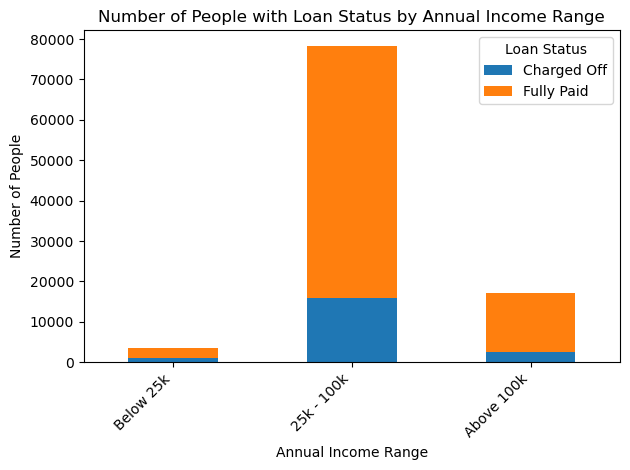

Ratio for each income range:
Below 25k     0.266236
25k - 100k    0.203183
Above 100k    0.146360
dtype: float64


In [28]:
# Filter data for income ranges
filtered_data = annual_income_loan_status.copy()

# Group filtered data by annual income and loan status, and count occurrences
grouped_data = filtered_data.groupby(['annual_inc', 'loan_status']).size().unstack(fill_value=0)

# Aggregate by annual income and sum the counts for each loan status
grouped_data = grouped_data.groupby(pd.cut(grouped_data.index, 
                                            bins=[-float('inf'), 25000, 100000, float('inf')],
                                            labels=['Below 25k', '25k - 100k', 'Above 100k'])).sum()

# Plot histogram
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Annual Income Range')
plt.ylabel('Number of People')
plt.title('Number of People with Loan Status by Annual Income Range')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

# Calculate the ratio for each income range
ratio_by_income_range = grouped_data['Charged Off'] / grouped_data.sum(axis=1)

# Print the ratio for each income range
print("Ratio for each income range:")
print(ratio_by_income_range)

In [29]:
# Convert 'issue_d' column to string
df['issue_d'] = df['issue_d'].astype(str)

# Concatenate multiple identifying columns to create a unique identifier
df['unique_identifier'] = df['emp_title'] + '_' + df['annual_inc'].astype(str) + '_' + df['issue_d'] + '_' + df['address']

# Check for duplicate unique identifiers
duplicate_identifiers = df['unique_identifier'].duplicated(keep=False)

# Filter the DataFrame to show rows with duplicate identifiers
duplicates_df = df[duplicate_identifiers]

# Display the rows with duplicate identifiers
print("Rows with duplicate identifiers:")
print(duplicates_df)

Rows with duplicate identifiers:
       loan_amnt        term  int_rate  installment emp_title emp_length  \
35          5375   36 months     13.11       181.39       NaN        NaN   
36          3250   36 months     16.78       115.52       NaN        NaN   
40         35000   60 months     16.99       869.66       NaN    4 years   
49         15000   36 months      7.89       469.29       NaN        NaN   
58         10000   36 months     17.56       359.33       NaN        NaN   
...          ...         ...       ...          ...       ...        ...   
98933      15000   36 months      9.67       481.69       NaN  10+ years   
98986      10000   36 months      9.16       318.75       NaN        NaN   
98999       2975   36 months     13.05       100.32       NaN        NaN   
99002      28000   36 months     11.14       918.55       NaN        NaN   
99005      24000   60 months     14.47       564.31       NaN  10+ years   

      home_ownership  annual_inc verification_status  

as a baseline gradient boosting works better in tabular data

In [30]:
x=[1,2,3,4]
print(x[:2])
print(x[3:])

[1, 2]
[4]


In [32]:
print(numerical_columns)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


In [31]:
numerical_columns = training_set.select_dtypes(include='number').columns.tolist()
numerical_training_set = training_set[numerical_columns].copy()
numerical_training_set.dropna(axis=1, inplace=True)

X,y = numerical_training_set.drop('loan_status', axis=1), training_set['loan_status']

# Initialize RobustScaler
robust_scaler = RobustScaler()

#initialize StandardScaler
scaler = sklearn.preprocessing.StandardScaler()

# Fit and transform the numerical features
X = robust_scaler.fit_transform(X)
#X= scaler.fit_transform(X)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize logistic regression model
model = LogisticRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features

# Fit RFE
#rfe.fit(X, y)
rfe.fit(X_resampled, y_resampled)

# Get selected features
X = X[:, rfe.support_]

model.fit(X, y)
y_pred = model.predict(X)
y_prob = model.predict_proba(X)
y_prob_positive_class = y_prob[:, 1]

# Evaluate the model
print("y_prob_positive_class:", y_prob_positive_class)
print("y_pred:", y_pred)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred))

# Get the number of 1s (positive instances)
num_ones = np.sum(y)

# Get the number of 0s (negative instances)
num_zeros = len(y) - num_ones

# Compute the true positive rate
tpr = np.sum((y == 1) & (y_pred == 1)) / num_ones
print("True Positive Rate:", tpr)

# Calculate the number of true negative instances
num_negatives = np.sum(y == 0)

# Calculate the number of false positive predictions
num_false_positives = np.sum((y == 0) & (y_pred == 1))

# Calculate the false positive rate
false_positive_rate = num_false_positives / num_negatives

print("False Positive Rate:", false_positive_rate)

false_positives = np.sum((y == 1) & (y_pred == 0)) #important!

print("False Positives:", false_positives)


NameError: name 'training_set' is not defined

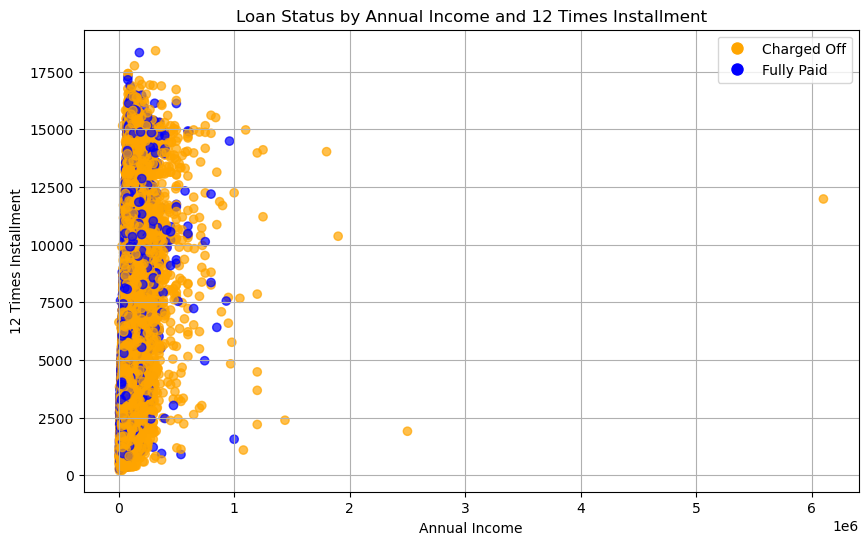

In [ ]:
# Calculate 12 times the installment
df["12_times_installment"] = df["installment"] * 12

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
colors = {"Fully Paid": "orange", "Charged Off": "blue"}
plt.scatter(df["annual_inc"], df["12_times_installment"], c=df["loan_status"].apply(lambda x: colors[x]), alpha=0.7)
plt.xlabel("Annual Income")
plt.ylabel("12 Times Installment")
plt.title("Loan Status by Annual Income and 12 Times Installment")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Charged Off'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Fully Paid')])
plt.grid(True)
plt.show()

it compiles but bad work

In [ ]:
#fix random seed
torch.manual_seed(59)

numerical_columns = training_set.select_dtypes(include='number').columns.tolist()
numerical_training_set = training_set[numerical_columns].copy()
numerical_training_set.dropna(axis=1, inplace=True)

X,y = numerical_training_set.drop('loan_status', axis=1), training_set['loan_status']

# Get column names before scaling
feature_names = X.columns.tolist()

# Initialize scalers
robust_scaler = RobustScaler()
scaler = sklearn.preprocessing.StandardScaler()

# Fit and transform the numerical features
X_scaled = robust_scaler.fit_transform(X)
#X= scaler.fit_transform(X)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#initialize neural network
input_size = X_resampled.shape[1]
hidden_size1 = 64
hidden_size2 = 64
hidden_size3 = 64
#possibly pick custom weight initialization
model = PD_NN(input_size, hidden_size1, hidden_size2, hidden_size3)

# Define the loss function (Binary Cross-Entropy Loss) with L1 regularization
criterion = nn.BCELoss()

# Define the optimizer with L1 regularization (Lasso)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.1)  # L1 regularization (weight_decay)


#MINI BATCHES???? HAVE TO DO IT 

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(torch.tensor(X_resampled, dtype=torch.float32))
    loss = criterion(outputs, torch.tensor(y_resampled.values, dtype=torch.float32).view(-1, 1))

    # Add L1 regularization to the loss
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)  # L1 norm of the weights

    loss += 0.001 * l1_regularization  # Adjust the regularization strength (lambda = 0.01)

    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()

In [ ]:
X_tensor=torch.tensor(X_scaled, dtype=torch.float32)
with torch.no_grad():
    y_prob_tensor = model(X_tensor)
    y_prob_numpy = y_prob_tensor.numpy()

# Convert probabilities to predicted class labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred = (y_prob_numpy > 0.5).astype(int)

# Print vector of probabilities
#print("Probabilities for each sample in the test set:")
#print(y_prob_numpy)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming 'y' and 'y_pred' are the ground truth labels and predicted labels, respectively

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Calculate true negative, false positive, false negative, and true positive rates
TN, FP, FN, TP = cm.ravel()

true_negative_rate = TN / (TN + FP)
true_positive_rate = TP / (TP + FN)
print("True Negative Rate (non default as non default):", true_negative_rate)
print("True Positive Rate (default as default):", true_positive_rate)

# Print accuracy and classification report
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred))

In [ ]:
numerical_columns = validation_set.select_dtypes(include='number').columns.tolist()
numerical_validation_set = validation_set[numerical_columns].copy()
numerical_validation_set.dropna(axis=1, inplace=True)
numerical_validation_set.drop('pub_rec_bankruptcies', axis=1, inplace=True) #it is not in the training set

X,y = numerical_validation_set.drop('loan_status', axis=1), validation_set['loan_status']

# Initialize scalers
robust_scaler = RobustScaler()
scaler = sklearn.preprocessing.StandardScaler()

# Fit and transform the numerical features
X = robust_scaler.fit_transform(X)

# Convert validation data to PyTorch tensor
X_tensor=torch.tensor(X, dtype=torch.float32)

# Predict probabilities for the test set
with torch.no_grad():
    y_prob_tensor = model(X_tensor)
    y_prob_numpy = y_prob_tensor.numpy()

# Convert probabilities to predicted class labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred = (y_prob_numpy > 0.5).astype(int)

# Print vector of probabilities
#print("Probabilities for each sample in the test set:")
#print(y_prob_numpy)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming 'y' and 'y_pred' are the ground truth labels and predicted labels, respectively

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Extract TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate false negative rate (FNR) and false positive rate (FPR)
true_positive_rate = TP / (TP + FN)
false_positive_rate = FP / (FP + TN)
true_negative_rate = TN / (TN + FP)
false_negative_rate = FN / (FN + TP)
# Print false negative rate and false positive rate
print("True Positive Rate (TPR):", true_positive_rate)
print("False Positive Rate (FPR):", false_positive_rate) #this is not what i am looking for due to my formulation
print("True Negative Rate (TNR):", true_negative_rate)
print("False Negative Rate (FNR):", false_negative_rate) #i think this is the important one

# Print accuracy and classification report
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred))